<a href="https://colab.research.google.com/github/KOHAKUDEUS/Healthcare-Machine-Learning/blob/main/ML_Kaggle_Breast_Cancer_Wisconsin_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
file_path ='/content/drive/MyDrive/100+ Machine Learning Projects with Source Code [2024]/Healthcare/Data for healthcare/ML  Kaggle Breast Cancer Wisconsin Diagnosis.csv'
import pandas as pd
df = pd.read_csv(file_path)
print(df.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [76]:
df_columns = df.columns

In [77]:
df_columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [79]:
df = df.drop(['Unnamed: 32', 'id'], axis = 1)

In [80]:
 X = df.drop(['diagnosis'], axis = 1 )
 y = df['diagnosis']
 from sklearn.preprocessing import LabelEncoder
 label_encoder = LabelEncoder()
 y = label_encoder.fit_transform(y)

In [91]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

min_max_sclaer = MinMaxScaler()

X_scaled = pd.DataFrame(min_max_sclaer.fit_transform(X), columns = X.columns)


In [82]:
print(X_scaled.describe())

       radius_mean  texture_mean  perimeter_mean   area_mean  smoothness_mean  \
count   569.000000    569.000000      569.000000  569.000000       569.000000   
mean      0.338222      0.323965        0.332935    0.216920         0.394785   
std       0.166787      0.145453        0.167915    0.149274         0.126967   
min       0.000000      0.000000        0.000000    0.000000         0.000000   
25%       0.223342      0.218465        0.216847    0.117413         0.304595   
50%       0.302381      0.308759        0.293345    0.172895         0.390358   
75%       0.416442      0.408860        0.416765    0.271135         0.475490   
max       1.000000      1.000000        1.000000    1.000000         1.000000   

       compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
count        569.000000      569.000000           569.000000     569.000000   
mean           0.260601        0.208058             0.243137       0.379605   
std            0.161992        0.

In [83]:
#split data tranning
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state=42)
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T
print("x train: ", X_train.shape)
print("x test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (30, 398)
x test:  (30, 171)
y train:  (398,)
y test:  (171,)


In [84]:
def initialize_weight_and_bias(dimension):
  w = np.full((dimension, 1), 0.01)
  b = 0.0
  return w, b

In [85]:
def sigmoid(z):
  y_head = 1/(1 + np.exp(-z))
  return y_head


In [86]:
def forward_backward_propagation(w, b, X_train, y_train):
  z = np.dot(w.T, X_train) + b
  #estimater of y
  y_head = sigmoid(z)
  loss = - y_train * np.log(y_head) - (1 - y_train)* np.log(1 - y_head)
  cost = (np.sum(loss)) / X_train.shape[1]
  #backward propagation
  #X_train.shape[1]  == n
  derivative_weight = np.dot(X_train, (y_head - y_train).T)/X_train.shape[1]

  derivative_bias = np.sum(y_head - y_train)/X_train.shape[1]

  gradients = {"derivative_weight" : derivative_weight,
               "derivative_bias" : derivative_bias
               }
  return cost, gradients

In [88]:
import matplotlib.pyplot as plt
import numpy as np

def update(w, b, X_train, y_train, learning_rate, number_of_iteration):
  cost_list = []
  cost_list2 = []
  index = []
  #updating learnable parameters with loops number_of_iteration times
  for i in range(number_of_iteration):
    cost, gradients = forward_backward_propagation(w, b, X_train, y_train)
    cost_list.append(cost)

    #let's update
    w = w - learning_rate * gradients["derivative_weight"]
    b = b - learning_rate * gradients["derivative_bias"]
    if i%10 == 0:
      cost_list2.append(cost)
      index.append(i)
      print("Cost after iteration % i %f" %(i, cost))
  parameters = {"weight": w, "bias": b}
  plt.plot(index, cost_list2)
  plt.xticks(index, rotation = 'vertical')
  plt.ylabel("cost")
  plt.show()
  return parameters, gradients, cost_list

In [93]:
import numpy as np
def predict(w, b, X_test):
  z = sigmoid(np.dot(w.T, X_test) + b)
  Y_prediction = np.zeros((1, X_test.shape[1]))

  for i in range(z.shape[1]):
    Y_prediction[0, i] = 0 if z[0, i] <= 0.5 else 1
  return Y_prediction

Cost after iteration  0 0.692854
Cost after iteration  10 0.503058
Cost after iteration  20 0.410304
Cost after iteration  30 0.355382
Cost after iteration  40 0.318944
Cost after iteration  50 0.292845
Cost after iteration  60 0.273110
Cost after iteration  70 0.257574
Cost after iteration  80 0.244958
Cost after iteration  90 0.234461


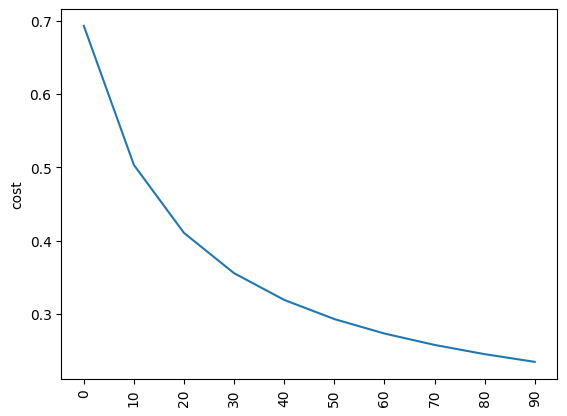

train accuracy: 94.22110552763819%
test accuracy: 95.32163742690058%


In [94]:
import numpy as np
def logistic_regression(X_train, y_train, X_test, y_test, learning_rate, num_iterations):
  dimension = X_train.shape[0]
  w, b = initialize_weight_and_bias(dimension)
  parameters, gradients, cost_list = update(w, b, X_train, y_train, learning_rate, num_iterations)
  y_prediction_test = predict(
      parameters["weight"],
      parameters["bias"],
      X_test
  )
  y_prediction_train = predict(
      parameters["weight"],
      parameters["bias"],
      X_train
  )

  #train/ test Errors
  print("train accuracy: {}%".format(
      100 - np.mean(np.abs(y_prediction_train - y_train))*100
  ))

  print("test accuracy: {}%".format(
      100 - np.mean(np.abs(y_prediction_test - y_test) * 100
      )))

logistic_regression(X_train, y_train, X_test, y_test,learning_rate=1, num_iterations=100)

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [98]:
from sklearn.linear_model  import LogisticRegression
model = LogisticRegression(penalty = 'l2')
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [99]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

0.9707602339181286
